In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext nb_mypy 

ModuleNotFoundError: No module named 'nb_mypy'

# 10.1 Introduction

- In Python everything is an object
- Object-based programming: create and use objects of existing classes
- To take maximum advantage of Python you must familiarize yourself with lots of preexisting classes
- Object-oriented programming: create your own classes
- Object-oriented programming makes it easier to design, implement, test, debug and update applications

# 10.2 Custom Class Account 

- A class combines *data* and *methods* operating on the data.
- Bank `Account` class 
    - data: account holder’s name and balance
    - methods:
        - Create an account
        - Deposit money
        - Clear account
        - Get balance
        - Get name
       
    
Of course, an actual bank account class would likely include lots of other information

## Decimal class

[https://docs.python.org/3/library/decimal.html](https://docs.python.org/3/library/decimal.html)

In [3]:
from decimal import Decimal, getcontext
a = Decimal(10)
a

Decimal('10')

In [4]:
a + a

Decimal('20')

In [6]:
getcontext().prec = 2

In [7]:
Decimal(1.1)  + Decimal(2.2)

Decimal('3.3')

In [8]:
1.1 + 2.2

3.3000000000000003

### First Account class

In [10]:
# account.py
"""Account class definition."""
from decimal import Decimal

class Account:
    """Account class for maintaining a bank account balance."""
    
    def __init__(self, name : str, balance : Decimal) -> None:
        """Initialize an Account object."""

        self.name = name
        self.balance = balance

### Creating an account object

In [11]:
account1 = Account('John Green', Decimal('50.00'))

Python Tutor:

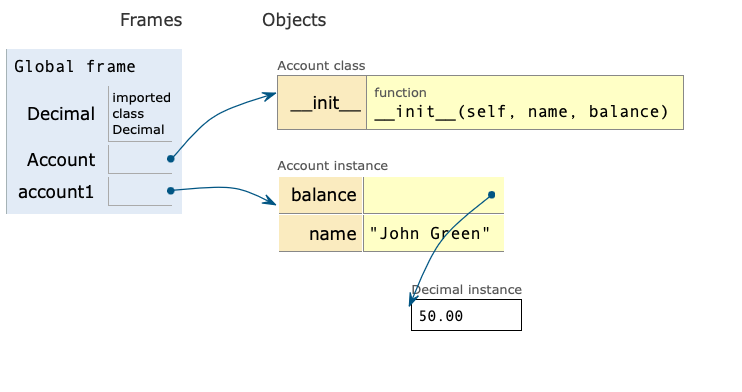

### Adding a welcome message

In [18]:
# account.py
"""Account class definition."""
from decimal import Decimal

class Account:
    """Account class for maintaining a bank account balance."""
    
    def __init__(self, name : str, balance : Decimal) -> None:
        """Initialize an Account object."""

        self.name = name
        self.balance = balance
        print(f"Welcome {name}")

In [19]:
account_bond = Account('James Bond',Decimal('100000000'))

Welcome James Bond


Python Tutor:

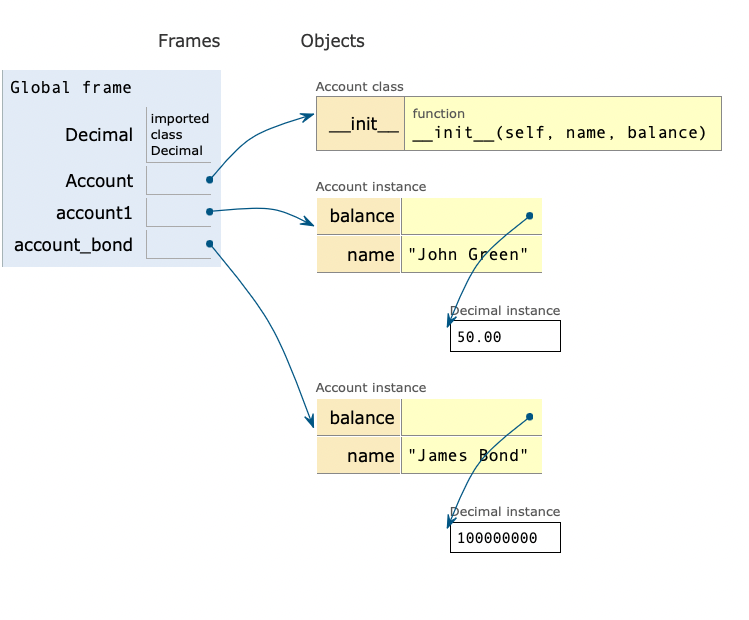

### Accessing values

In [13]:
# what are the values of the attributes?
account1.__dict__

{'name': 'John Green', 'balance': Decimal('50.00')}

In [15]:
account1.name

'John Green'

In [14]:
account1.balance

Decimal('50.00')

In [17]:
account1.balance += Decimal(100)
account1.balance

Decimal('2.5E+2')

### Adding a deposit method

In [20]:
# account.py
"""Account class definition."""
from decimal import Decimal

class Account:
    """Account class for maintaining a bank account balance."""
    
    def __init__(self, name : str, balance : Decimal) -> None:
        """Initialize an Account object."""

        self.name = name
        self.balance = balance
        print(f"Welcome {name}")
        
    def deposit(self, amount : Decimal) -> None:
        """Deposit money to the account."""

        # if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self.balance += amount

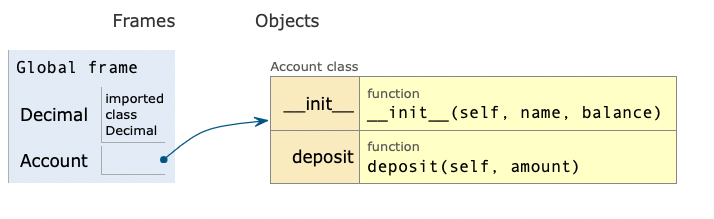

In [21]:
account1 = Account('John Green', Decimal('50.00'))
account1.deposit(Decimal('25.53'))
account1.balance

Welcome John Green


Decimal('76')

In [22]:
account1.deposit(Decimal('-123.45'))

ValueError: amount must be positive.

### Adding bonus and clear_account

In [23]:
account2.balance = 0
account2.balance

NameError: name 'account2' is not defined

In [ ]:
# account.py
"""Account class definition."""
from decimal import Decimal

class Account:
    """Account class for maintaining a bank account balance."""
    
    def __init__(self, name : str, balance : Decimal, bonus : Decimal = Decimal('0.00')) -> None:
        """Initialize an Account object."""

        self.name = name
        self.balance = balance + bonus
        print(f"Welcome {self.name}. Your account balance is: {self.balance}")
        
    def deposit(self, amount : Decimal) -> None:
        """Deposit money to the account."""

        # if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self.balance += amount
        
    def clear_account(self) -> None:
        self.balance = 0


In [ ]:
account2 = Account("Frank", Decimal("100"), Decimal(25))

In [ ]:
account2.clear_account()
account2.balance

## Negative balance

How do we prevent accounts to have a negative value?

In [ ]:
account2.balance = -10
account2.balance

## Properties and Setters

In [ ]:
# account.py
"""Account class definition."""
from decimal import Decimal

class Account:
    """Account class for maintaining a bank account balance."""
    
    def __init__(self, name : str, balance : Decimal, bonus : Decimal = Decimal('0.0')) -> None:
        """Initialize an Account object."""

        self.name = name
        self.balance = balance + bonus
        print(f"Welcome {self.name}. Your account balance is: {self.balance}")
        

    @property
    def balance(self):
        print("@property balance is called")
        return self._balance
        
    @balance.setter
    def balance(self, balance):
        print("@balance.setter is called")
        if balance < Decimal('0.00'):
            raise ValueError('Balance must be >= to 0.00.')
        self._balance = balance    

        
    def deposit(self, amount : Decimal) -> None:
        """Deposit money to the account."""

        # if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self.balance += amount
        
    def clear_account(self) -> None:
        self.balance = 0


In [ ]:
account2 = Account("Frank", Decimal("100"), Decimal(25))

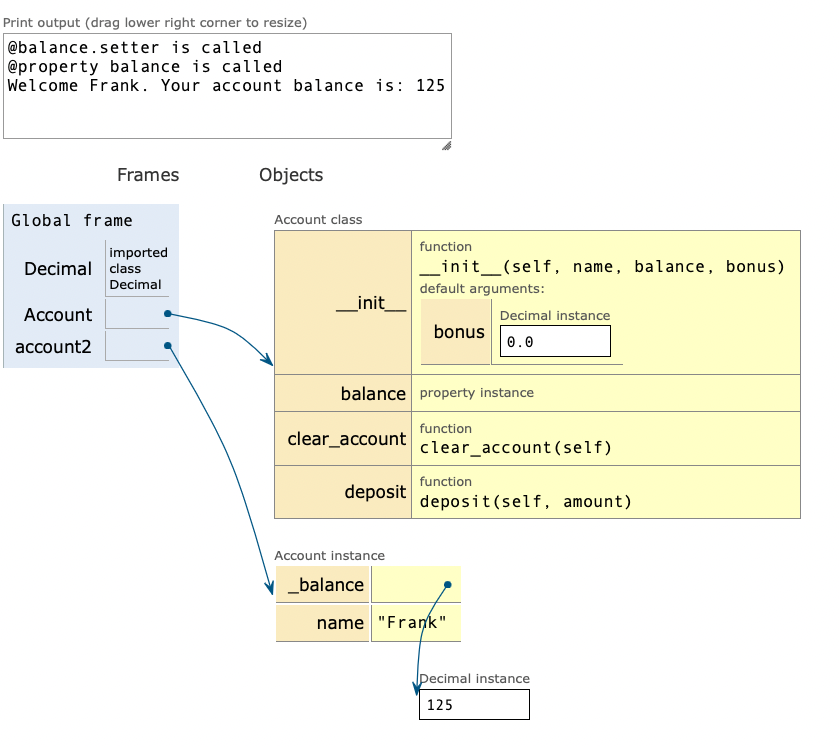

In [ ]:
account2.balance = 20

In [ ]:
account2.name = "Mr. " +  account2.name
account2.name

In [ ]:
# account.py
"""Account class definition."""
from decimal import Decimal

class Account:
    """Account class for maintaining a bank account balance."""
    
    def __init__(self, name : str, balance : Decimal, bonus : Decimal = Decimal('0.0')) -> None:
        """Initialize an Account object."""

        self.name = name
        self.balance = balance + bonus
        print(f"Welcome {self.name}. Your account balance is: {self.balance}")
        
    @property
    def name(self):
        print("@property name is called")
        return self._name
        
    @name.setter
    def name(self, name):
        print("@name.setter is called")
        self._name = name
        
    @property
    def balance(self):
        print("@property balance is called")
        return self._balance
        
    @balance.setter
    def balance(self, balance):
        print("@balance.setter is called")
        if balance < Decimal('0.00'):
            raise ValueError('Balance must be >= to 0.00.')
        self._balance = balance    

        
    def deposit(self, amount : Decimal) -> None:
        """Deposit money to the account."""

        # if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self.balance += amount
        
    def clear_account(self) -> None:
        self.balance = 0


In [ ]:
account2 = Account("Frank", Decimal("100"), Decimal(25))

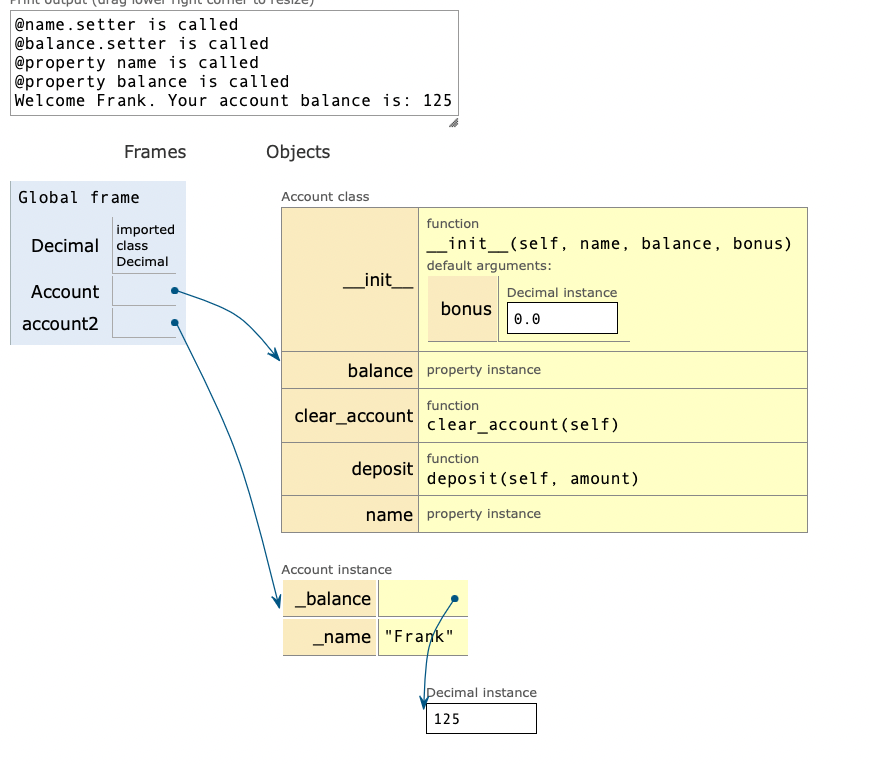

## name vs _name

In [ ]:
account2.__dict__

Convention in Python is to never access attributes that start with an underscore outside of the class definition. The following is therefore frowned upon:

In [ ]:
account2._balance = 50
account2.balance

Conventional way is to use the setter:

In [ ]:
account2.balance = 50
account2.balance

In [ ]:
account2._balance = -50
account2.balance

## Using a class in a program requires an import

In [ ]:
from account_def import Account

In [ ]:
account3 = Account("Amy",Decimal(10))